📂 Please select your uniteevaluationfonciere.csv file to upload...


Saving uniteevaluationfonciere.csv to uniteevaluationfonciere.csv
✅ Data loaded!
    ID_UEV  CIVIQUE_DEBUT  CIVIQUE_FIN                     NOM_RUE  \
0  1038405           3577         3577   avenue Atwater  (MTL+WMT)   
1  5213144           5211         5211        rue du Sureau  (PFD)   
2  1036349           3550         3550   rue de la Montagne  (MTL)   
3  5189527           1200         1200  rue Saint-Alexandre  (MTL)   
4  1037334           1254         1254       rue Saint-Marc  (MTL)   

  SUITE_DEBUT  MUNICIPALITE  ETAGE_HORS_SOL  NOMBRE_LOGEMENT  \
0         NaN            50             NaN              NaN   
1         105            50             1.0              1.0   
2         109            50             3.0              1.0   
3         511            50             1.0              1.0   
4          61            50             1.0              1.0   

   ANNEE_CONSTRUCTION  CODE_UTILISATION LETTRE_DEBUT LETTRE_FIN  \
0                1983              1921       

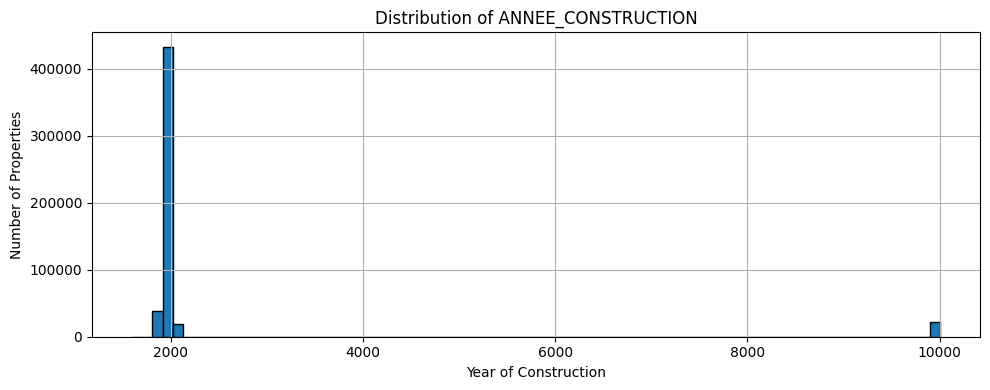

✅ Marked 21689 entries as invalid construction years.
✅ Cleaned data saved to: /content/eval_cleaned.csv


/tmp/ipython-input-1-1528457274.py:154: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RATIO_SURFACE"].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-1-1528457274.py:157: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

✅ Feature-engineered data saved to: /content/eval_cleaned_feat_eng.csv


,ID_UEV,CIVIQUE_DEBUT,CIVIQUE_FIN,NOM_RUE,SUITE_DEBUT,MUNICIPALITE,ETAGE_HORS_SOL,NOMBRE_LOGEMENT,ANNEE_CONSTRUCTION,CODE_UTILISATION,...,CATEGORIE_UEF,MATRICULE83,SUPERFICIE_TERRAIN,SUPERFICIE_BATIMENT,NO_ARROND_ILE_CUM,AGE_BATIMENT,RATIO_SURFACE,DENSITE_LOGEMENT,HAS_MULTIPLE_LOGEMENTS,FIRE_FREQUENCY_ZONE
0,1038405,3577,3577,avenue Atwater (MTL+WMT),NaN,50,1.0,1.0,1983.0,1921,...,Condominium,9739-83-9737-8-001-0431,2,16.0,REM19,0.020257,0.002256,0.002232,0,0.571625
1,5213144,5211,5211,rue du Sureau (PFD),105,50,1.0,1.0,2012.0,1000,...,Condominium,7941-06-3037-4-001-0004,69,68.0,REM31,0.005929,0.000278,0.000525,0,0.208240
2,1036349,3550,3550,rue de la Montagne (MTL),109,50,3.0,1.0,1983.0,1000,...,Condominium,9840-31-8010-6-001-0005,133,127.0,REM19,0.020257,0.000269,0.000281,0,0.571625
3,5189527,1200,1200,rue Saint-Alexandre (MTL),511,50,1.0,1.0,1963.0,1000,...,Condominium,9940-55-8522-7-001-0257,16,62.0,REM19,0.030138,0.001093,0.000576,0,0.571625
4,1037334,1254,1254,rue Saint-Marc (MTL),61,50,1.0,1.0,1914.0,1000,...,Condominium,9839-51-6255-9-001-0013,16,82.0,REM19,0.054348,0.001445,0.000436,0,0.571625


In [1]:
# =========================
# 🚀 1) Upload your CSV
# =========================
from google.colab import files

print("📂 Please select your uniteevaluationfonciere.csv file to upload...")
uploaded = files.upload()

# This saves it to /content/
ORIGINAL_FILE_NAME_EVAL = "/content/uniteevaluationfonciere.csv"
DESTINATION_FILE_NAME = "/content/eval_cleaned.csv"
DESTINATION_FILE_NAME_FEAT_ENG = "/content/eval_cleaned_feat_eng.csv"

# =========================
# 🚀 2) Imports
# =========================
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# =========================
# 🚀 3) Load CSV
# =========================
df_eval = pd.read_csv(ORIGINAL_FILE_NAME_EVAL)

print("✅ Data loaded!")
print(df_eval.head())
df_eval.info()

# =========================
# 🚀 4) Clean ANNEE_CONSTRUCTION
# =========================
year_series = df_eval["ANNEE_CONSTRUCTION"]
plt.figure(figsize=(10,4))
plt.hist(year_series, bins=80, edgecolor="black")
plt.title("Distribution of ANNEE_CONSTRUCTION")
plt.xlabel("Year of Construction")
plt.ylabel("Number of Properties")
plt.grid(True)
plt.tight_layout()
plt.show()

mask = (df_eval["ANNEE_CONSTRUCTION"] < 1800) | (df_eval["ANNEE_CONSTRUCTION"] > 2025)
df_eval.loc[mask, "ANNEE_CONSTRUCTION"] = np.nan
print(f"✅ Marked {mask.sum()} entries as invalid construction years.")

df_eval["ANNEE_CONSTRUCTION"] = df_eval["ANNEE_CONSTRUCTION"].fillna(0)

# Convert to numeric safely
df_eval["_ANNEE_CONSTRUCTION_NUM"] = pd.to_numeric(df_eval["ANNEE_CONSTRUCTION"], errors="coerce")

# Impute by borough median
mask_missing = df_eval["_ANNEE_CONSTRUCTION_NUM"].isna()
mask_buildings = df_eval["LIBELLE_UTILISATION"].str.contains("Logement|Immeuble", case=False, na=False)
mask_to_impute = mask_missing & mask_buildings

median_years_by_borough = (
    df_eval.loc[~mask_missing]
    .groupby("NO_ARROND_ILE_CUM")["_ANNEE_CONSTRUCTION_NUM"]
    .median()
)

for borough, median_year in median_years_by_borough.items():
    idx = mask_to_impute & (df_eval["NO_ARROND_ILE_CUM"] == borough)
    df_eval.loc[idx, "_ANNEE_CONSTRUCTION_NUM"] = median_year

df_eval["ANNEE_CONSTRUCTION"] = df_eval["_ANNEE_CONSTRUCTION_NUM"].fillna("unknown").astype(str)
df_eval.drop(columns=["_ANNEE_CONSTRUCTION_NUM"], inplace=True)

# =========================
# 🚀 5) Clean NOMBRE_LOGEMENT
# =========================
median_units = (
    df_eval.groupby(["NO_ARROND_ILE_CUM", "LIBELLE_UTILISATION"])["NOMBRE_LOGEMENT"]
    .median()
)

def impute_nombre(row):
    if pd.isna(row["NOMBRE_LOGEMENT"]):
        return median_units.get((row["NO_ARROND_ILE_CUM"], row["LIBELLE_UTILISATION"]), np.nan)
    return row["NOMBRE_LOGEMENT"]

df_eval["NOMBRE_LOGEMENT"] = df_eval.apply(impute_nombre, axis=1)

borough_units = df_eval.groupby("NO_ARROND_ILE_CUM")["NOMBRE_LOGEMENT"].median()
df_eval["NOMBRE_LOGEMENT"] = df_eval.apply(
    lambda r: borough_units.get(r["NO_ARROND_ILE_CUM"]) if pd.isna(r["NOMBRE_LOGEMENT"]) else r["NOMBRE_LOGEMENT"],
    axis=1
)

# =========================
# 🚀 6) Clean ETAGE_HORS_SOL
# =========================
median_etages = (
    df_eval.groupby(["NO_ARROND_ILE_CUM", "LIBELLE_UTILISATION"])["ETAGE_HORS_SOL"]
    .median()
)

def impute_etage(row):
    if pd.isna(row["ETAGE_HORS_SOL"]):
        return median_etages.get((row["NO_ARROND_ILE_CUM"], row["LIBELLE_UTILISATION"]), np.nan)
    return row["ETAGE_HORS_SOL"]

df_eval["ETAGE_HORS_SOL"] = df_eval.apply(impute_etage, axis=1)

borough_etage = df_eval.groupby("NO_ARROND_ILE_CUM")["ETAGE_HORS_SOL"].median()
df_eval["ETAGE_HORS_SOL"] = df_eval.apply(
    lambda r: borough_etage.get(r["NO_ARROND_ILE_CUM"]) if pd.isna(r["ETAGE_HORS_SOL"]) else r["ETAGE_HORS_SOL"],
    axis=1
)

# =========================
# 🚀 7) Clean SUPERFICIE_BATIMENT
# =========================
median_surface = (
    df_eval.groupby(["NO_ARROND_ILE_CUM", "LIBELLE_UTILISATION"])["SUPERFICIE_BATIMENT"]
    .median()
)

def impute_surface(row):
    if pd.isna(row["SUPERFICIE_BATIMENT"]):
        return median_surface.get((row["NO_ARROND_ILE_CUM"], row["LIBELLE_UTILISATION"]), np.nan)
    return row["SUPERFICIE_BATIMENT"]

df_eval["SUPERFICIE_BATIMENT"] = df_eval.apply(impute_surface, axis=1)

borough_surface = df_eval.groupby("NO_ARROND_ILE_CUM")["SUPERFICIE_BATIMENT"].median()
df_eval["SUPERFICIE_BATIMENT"] = df_eval.apply(
    lambda r: borough_surface.get(r["NO_ARROND_ILE_CUM"]) if pd.isna(r["SUPERFICIE_BATIMENT"]) else r["SUPERFICIE_BATIMENT"],
    axis=1
)

# =========================
# 🚀 8) Save cleaned version before feature engineering
# =========================
columns_to_drop = ["AGE_BATIMENT", "RATIO_SURFACE", "DENSITE_LOGEMENT", "IS_UNKNOWN_YEAR"]
cleaned_cols = [c for c in df_eval.columns if c not in columns_to_drop]
df_eval_cleaned = df_eval[cleaned_cols]
df_eval_cleaned.to_csv(DESTINATION_FILE_NAME, index=False)
print(f"✅ Cleaned data saved to: {DESTINATION_FILE_NAME}")

# =========================
# 🚀 9) Feature Engineering
# =========================
df = pd.read_csv(DESTINATION_FILE_NAME)
current_year = 2025

df["AGE_BATIMENT"] = df["ANNEE_CONSTRUCTION"].apply(
    lambda x: current_year - int(float(x)) if x != "unknown" else np.nan
)

df["RATIO_SURFACE"] = df["SUPERFICIE_BATIMENT"] / df["SUPERFICIE_TERRAIN"]
df["RATIO_SURFACE"].replace([np.inf, -np.inf], np.nan, inplace=True)

df["DENSITE_LOGEMENT"] = df["NOMBRE_LOGEMENT"] / df["SUPERFICIE_BATIMENT"]
df["DENSITE_LOGEMENT"].replace([np.inf, -np.inf], np.nan, inplace=True)

df["HAS_MULTIPLE_LOGEMENTS"] = (df["NOMBRE_LOGEMENT"] > 1).astype(int)
df["FIRE_FREQUENCY_ZONE"] = df["NO_ARROND_ILE_CUM"].map(df["NO_ARROND_ILE_CUM"].value_counts())

scaler = MinMaxScaler()
to_normalize = ["AGE_BATIMENT", "RATIO_SURFACE", "DENSITE_LOGEMENT", "FIRE_FREQUENCY_ZONE"]
df[to_normalize] = scaler.fit_transform(df[to_normalize])

# Keep original + engineered
original_cols = [
    'ID_UEV', 'CIVIQUE_DEBUT', 'CIVIQUE_FIN', 'NOM_RUE', 'SUITE_DEBUT', 'MUNICIPALITE',
    'ETAGE_HORS_SOL', 'NOMBRE_LOGEMENT', 'ANNEE_CONSTRUCTION', 'CODE_UTILISATION',
    'LETTRE_DEBUT', 'LETTRE_FIN', 'LIBELLE_UTILISATION', 'CATEGORIE_UEF', 'MATRICULE83',
    'SUPERFICIE_TERRAIN', 'SUPERFICIE_BATIMENT', 'NO_ARROND_ILE_CUM'
]
engineered_cols = ["AGE_BATIMENT", "RATIO_SURFACE", "DENSITE_LOGEMENT", "HAS_MULTIPLE_LOGEMENTS", "FIRE_FREQUENCY_ZONE"]

final_cols = list(dict.fromkeys(original_cols + engineered_cols))
df_final = df[final_cols]

df_final.to_csv(DESTINATION_FILE_NAME_FEAT_ENG, index=False)
print(f"✅ Feature-engineered data saved to: {DESTINATION_FILE_NAME_FEAT_ENG}")

df_final.head()

In [2]:
from google.colab import files
files.download("/content/eval_cleaned.csv")
files.download("/content/eval_cleaned_feat_eng.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>